In [1]:
clear()

In [2]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('HW5_train.csv')
test_df = pd.read_csv('HW5_future.csv')

## **Task 1: Build a model to predict the class labels of the test samples in 'HW5_future.csv'. Save the prediction results in 'HW5_result_1.csv', in which each row is a prediction.**

Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split

X = train_df.drop('target', axis=1)  # Features
y = train_df['target']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train model using RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = train_df.drop(['target'], axis=1)
y = train_df['target']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model_RF = RandomForestClassifier(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model_RF)])

In [5]:
# Fit the model using training data
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'Age', 'Users', 'AntAge', 'CntTotal', 'CntInact', 'CntContct',
       'limit', 'RevTotal', 'AvgFirst', 'TAC', 'TTA', 'TTC', 'TCC', 'AR'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Edu', 'Martial', 'Income', 'Membership'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=0))])

(array([1047.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

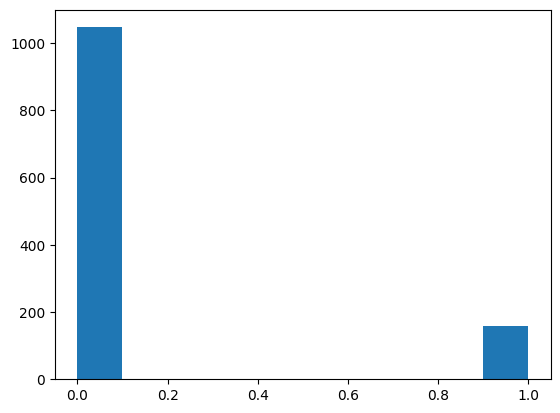

In [7]:
# Predict y using splitted test data
import matplotlib.pyplot as plt

y_pred_RF = clf.predict(X_test)

plt.hist(y_pred_RF)

In [8]:
# Calculate TP, TN, FP, FN
TP = sum((y_pred_RF == 1) & (y_test == 1))
TN = sum((y_pred_RF == 0) & (y_test == 0))
FP = sum((y_pred_RF == 1) & (y_test == 0))
FN = sum((y_pred_RF == 0) & (y_test == 1))

# Print out confusion matrix values
print('True Positives (TP):', TP)
print('True Negatives (TN):', TN)
print('False Positives (FP):', FP)
print('False Negatives (FN):', FN)

# Calculate Recall, Precision, and F1 score
Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
F1 = 2 * Recall * Precision / (Recall + Precision) if (Recall + Precision) != 0 else 0

print('F1:', F1)

True Positives (TP): 139
True Negatives (TN): 986
False Positives (FP): 18
False Negatives (FN): 61
F1: 0.7787114845938375


Apply in real test data

In [9]:
X_real_test = test_df.drop('target', axis=1)

In [10]:
# Predict on test data
test_predictions = clf.predict(X_real_test)

# Save predictions to CSV
pd.DataFrame(test_predictions, columns=['Prediction']).to_csv("HW5_result_1.csv", index=False)

## Task 2

Select top 4 variables using RandomForestClassifier

In [11]:
# Get feature importances
importances = model_RF.feature_importances_

# Sort the feature indices by importance
indices = np.argsort(importances)[::-1]

# Select the top 4 features
top_n = 4
top_feature_indices = indices[:top_n]

# Select top features
top_feature_names = X.columns[top_feature_indices].tolist()

print("Top 4 feature indices:", top_feature_indices)
print("Top 4 feature importances:", importances[top_feature_indices])
print("Top 4 feature names:", top_feature_names)

Top 4 feature indices: [11 12 13  8]
Top 4 feature importances: [0.14488122 0.13200002 0.11389971 0.11155867]
Top 4 feature names: ['CntContct', 'limit', 'RevTotal', 'AntAge']


In [12]:
# See the selected features
X_selected = X[top_feature_names]
X_selected.head(), X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CntContct  5906 non-null   float64
 1   limit      5915 non-null   float64
 2   RevTotal   5900 non-null   float64
 3   AntAge     6019 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 188.2 KB


(   CntContct         limit     RevTotal  AntAge
 0        1.0   3289.165931  2299.110601      47
 1        4.0   5556.859915  1169.192860      37
 2        3.0  43577.810310  1429.999991      35
 3        1.0   3073.881661  2190.116075      31
 4        4.0   5120.805796     0.000000      47,
 None)

The chosen columns are all numeric values.

In [13]:
# Preprocessing

numerical_cols = X_selected.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)])

In [14]:
# Split data to train, test set
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a new model using only the top 4 features
model_RF = RandomForestClassifier(n_estimators=100, random_state=0)

clf_selected = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_RF)])
clf_selected.fit(X_train_selected, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CntContct', 'limit', 'RevTotal', 'AntAge'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=0))])

(array([1071.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         133.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

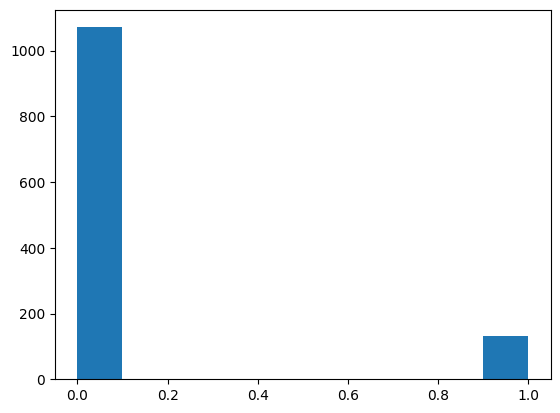

In [15]:
y_pred_RF_selected = clf_selected.predict(X_test_selected)

plt.hist(y_pred_RF_selected)

In [16]:
# Calculate TP, TN, FP, FN
TP = sum((y_pred_RF_selected == 1) & (y_test == 1))
TN = sum((y_pred_RF_selected == 0) & (y_test == 0))
FP = sum((y_pred_RF_selected == 1) & (y_test == 0))
FN = sum((y_pred_RF_selected == 0) & (y_test == 1))

# Print out confusion matrix values
print('True Positives (TP):', TP)
print('True Negatives (TN):', TN)
print('False Positives (FP):', FP)
print('False Negatives (FN):', FN)

# Calculate Recall, Precision, and F1 score
Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
F1 = 2 * Recall * Precision / (Recall + Precision) if (Recall + Precision) != 0 else 0

print('F1:', F1)

True Positives (TP): 64
True Negatives (TN): 935
False Positives (FP): 69
False Negatives (FN): 136
F1: 0.3843843843843843


In [17]:
# Get the test set
X_real_test_selected = test_df[top_feature_names]

# Predict on test data
test_predictions = clf_selected.predict(X_real_test_selected)

# Save predictions to CSV
pd.DataFrame(test_predictions, columns=['Prediction']).to_csv("HW5_result_2.csv", index=False)